In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_labels = train['label'].values
#Удаляем первый столбец (лейбл)
train_labels_data = train.drop('label',axis=1).values
test_labels_data = test.values
#print(train_labels.shape, train_labels_data.shape, test_labels_data.shape)

In [5]:
def plot_images(labels, images, rows, columns):
    fig, axes = plt.subplots(rows, columns, figsize=(10, 10))
    for i in range(rows * columns):
        ax = axes[i // columns, i % columns]
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()
#plot_images(train_labels, train_labels_data, 4, 4)

In [6]:
train_labels_data = train_labels_data / 255.0
test_labels_data = test_labels_data / 255.0

In [8]:
train_labels_data_split, val_labels_data_split, train_labels_split, val_labels_split = train_test_split(train_labels_data, train_labels, test_size=0.2, random_state=42)

In [79]:
import time

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_fit_time_start = time.time()
knn.fit(train_labels_data_split, train_labels_split)
knn_fit_time_end = time.time()
knn_fit_time = knn_time_end-knn_time_start

In [82]:
knn_pred_time_start = time.time()
knn_pred = knn.predict(val_labels_data_split)
knn_pred_time_end = time.time()
knn_pred_time = knn_pred_time_start - knn_pred_time_start

In [26]:
score_knn = accuracy_score(val_labels_split, knn_pred)
print(score_knn)

0.9666666666666667


In [27]:
knn_test_pred = knn.predict(test_labels_data)

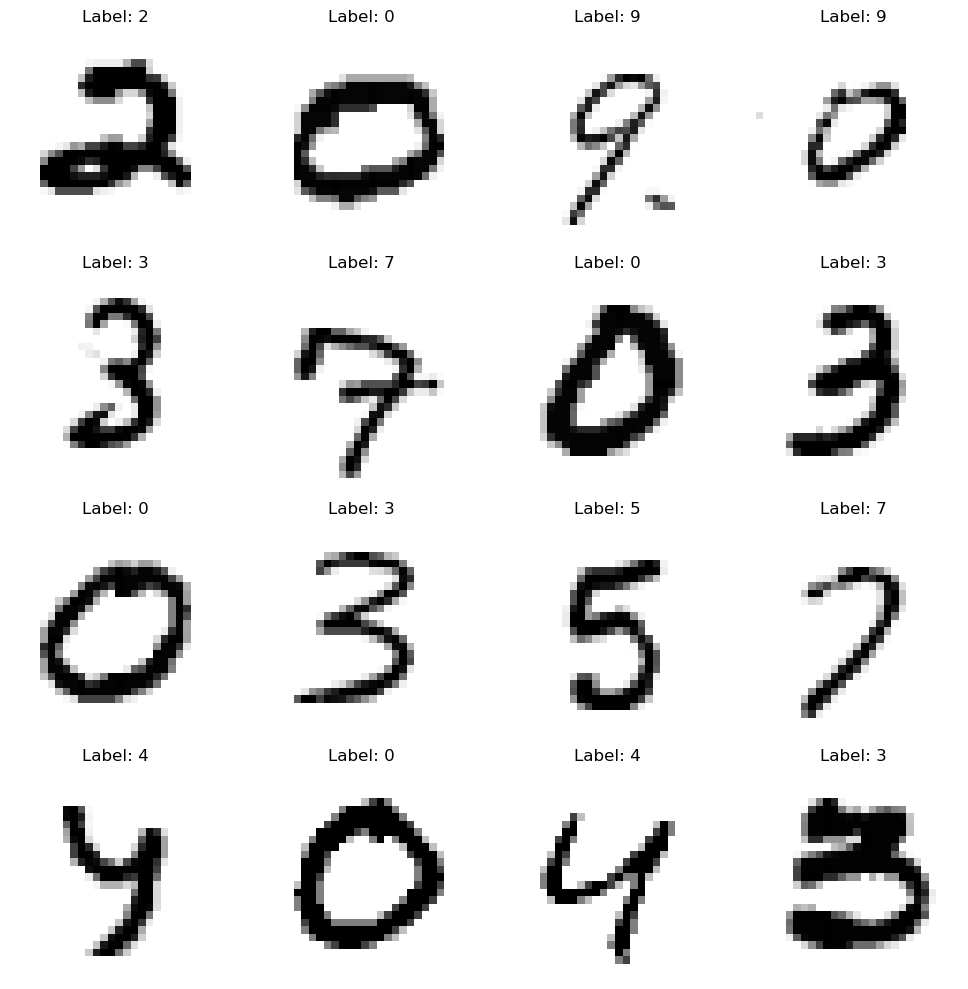

In [28]:
plot_images(knn_test_pred, test_labels_data, 4, 4)

In [29]:
def save_preds(test_pred,name):
    subsave = pd.DataFrame({'ImageId': range(1, len(test_pred) + 1), 'Label': name})
    subsave.to_csv(name+'.csv',index=False)

In [30]:
save_preds(knn_test_pred,"KNN_pred")

In [83]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm_fit_time_start = time.time()
svm.fit(train_labels_data_split, train_labels_split)
svm_fit_time_end = time.time()
svm_fit_time = svm_fit_time_end - svm_fit_time_start

In [84]:
svm_pred_time_start = time.time()
svс_pred = svс.predict(val_labels_data_split)
svm_pred_time_end = time.time()
svm_pred_time = svm_fit_time_end - svm_fit_time_start

In [99]:
score_svс = accuracy_score(val_labels_split, svс_pred)
print(score_svс)

0.9320238095238095


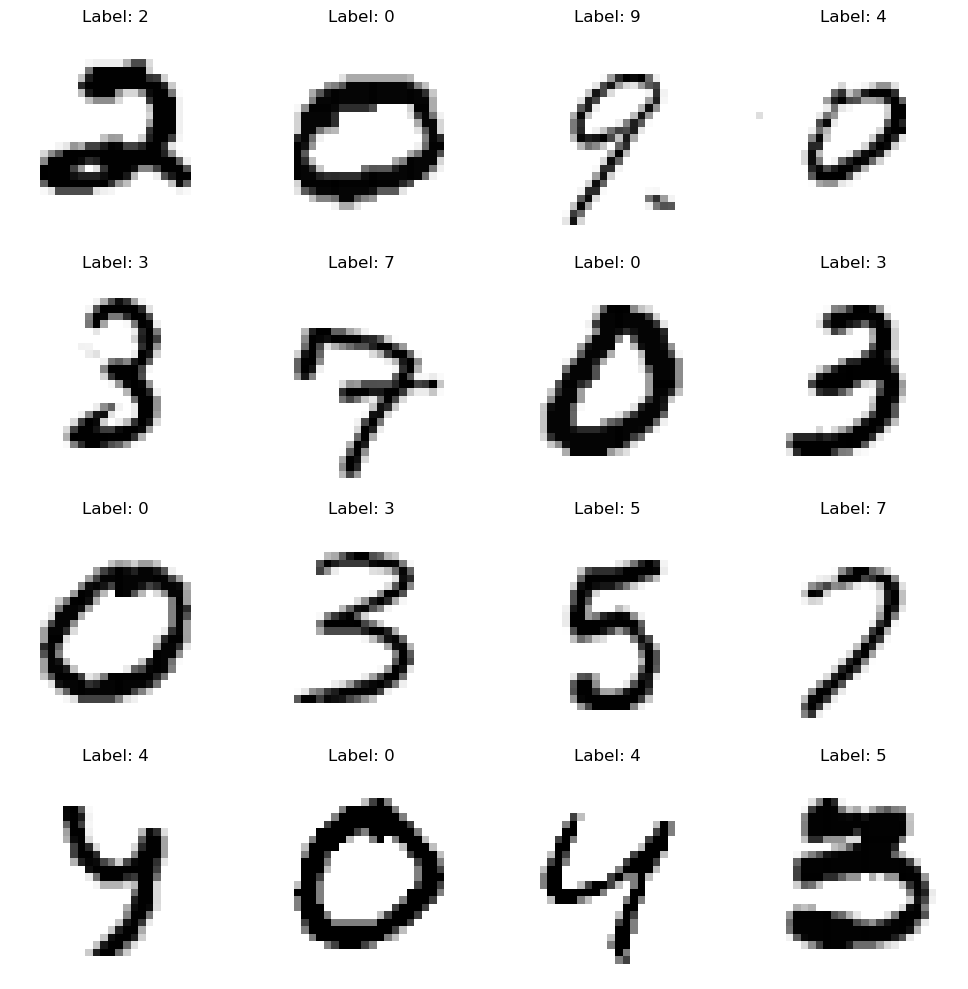

In [41]:
svc_test_pred = svm.predict(test_labels_data)
plot_images(svc_test_pred, test_labels_data, 4, 4)

In [42]:
save_preds(svc_test_pred,"SVC_pred")

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)

In [11]:
kmeans.fit(train_labels_data_split)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

In [12]:
kmeans_pred = kmeans.predict(train_labels_data_split)

In [14]:
kmeans_classes = np.zeros_like(kmeans_pred)
# Идёт сравнение массивов в лоб, 10 - количество кластеров
for i in range(10):
    mask = (kmeans_pred == i)
    kmeans_classes[mask] = np.bincount(train_labels_split[mask]).argmax()

kmeans_val_pred = kmeans.predict(val_labels_data_split)
kmeans_val_classes = np.zeros_like(kmeans_val_pred)
for i in range(10):
    mask = (kmeans_val_pred == i)
    kmeans_val_classes[mask] = np.bincount(val_labels_split[mask]).argmax()

score_kmeans = accuracy_score(val_labels_split, kmeans_val_classes)
print(score_kmeans)

[1 1 1 ... 1 1 1]
[8 8 8 ... 8 8 8]
[3 3 3 ... 3 3 3]
[6 6 6 ... 6 6 6]
[1 1 1 ... 1 1 1]
[2 2 2 ... 2 2 2]
[4 4 4 ... 4 4 4]
[7 7 7 ... 7 7 7]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


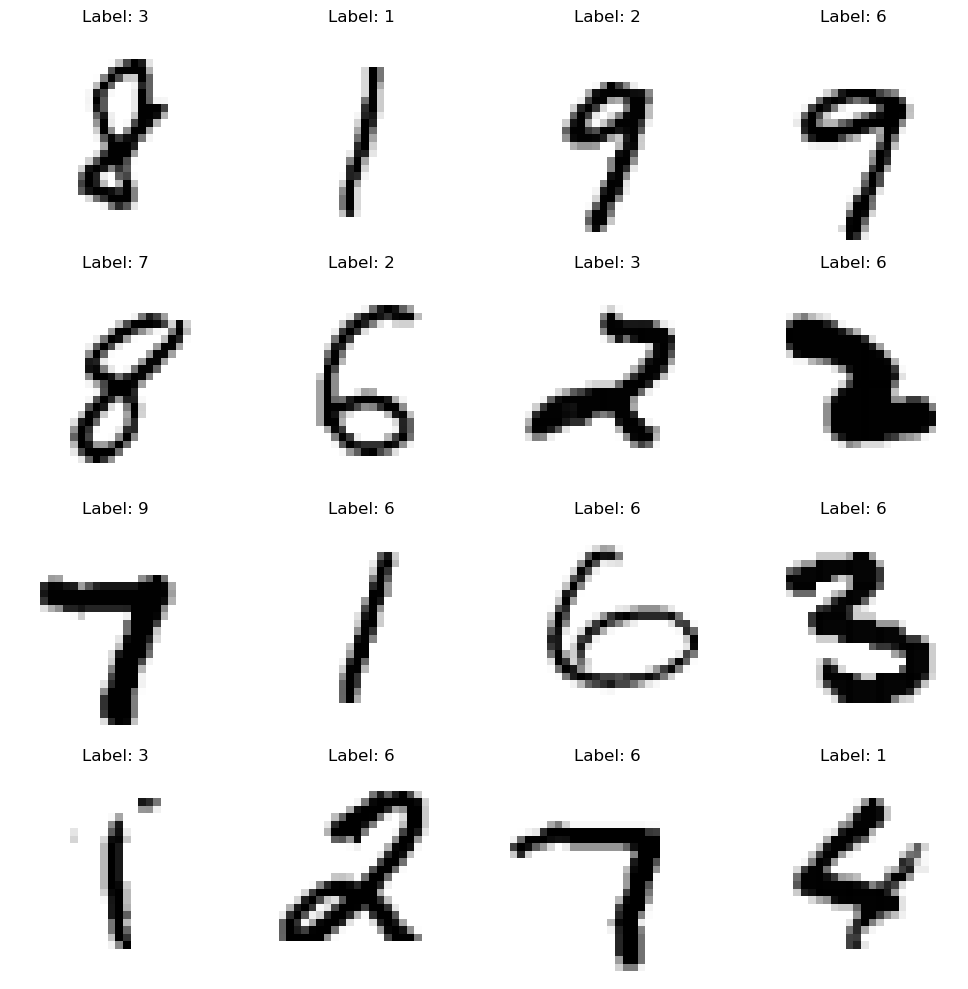

In [68]:
plot_images(kmeans_pred, val_labels_data_split, 4, 4)

In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_fit_time_start = time.time()
nb.fit(train_labels_data_split, train_labels_split)
nb_fit_time_end = time.time()
nb_fit_time = nb_fit_time_end - nb_fit_time_start

In [89]:
nb_pred_time_start = time.time()
nb_pred = nb.predict(val_labels_data_split)
nb_pred_time_end = time.time()
nb_pred_time = nb_pred_time_end - nb_pred_time_start
score_nb = accuracy_score(val_labels_split, nb_pred)
print(score_nb)

0.5658333333333333


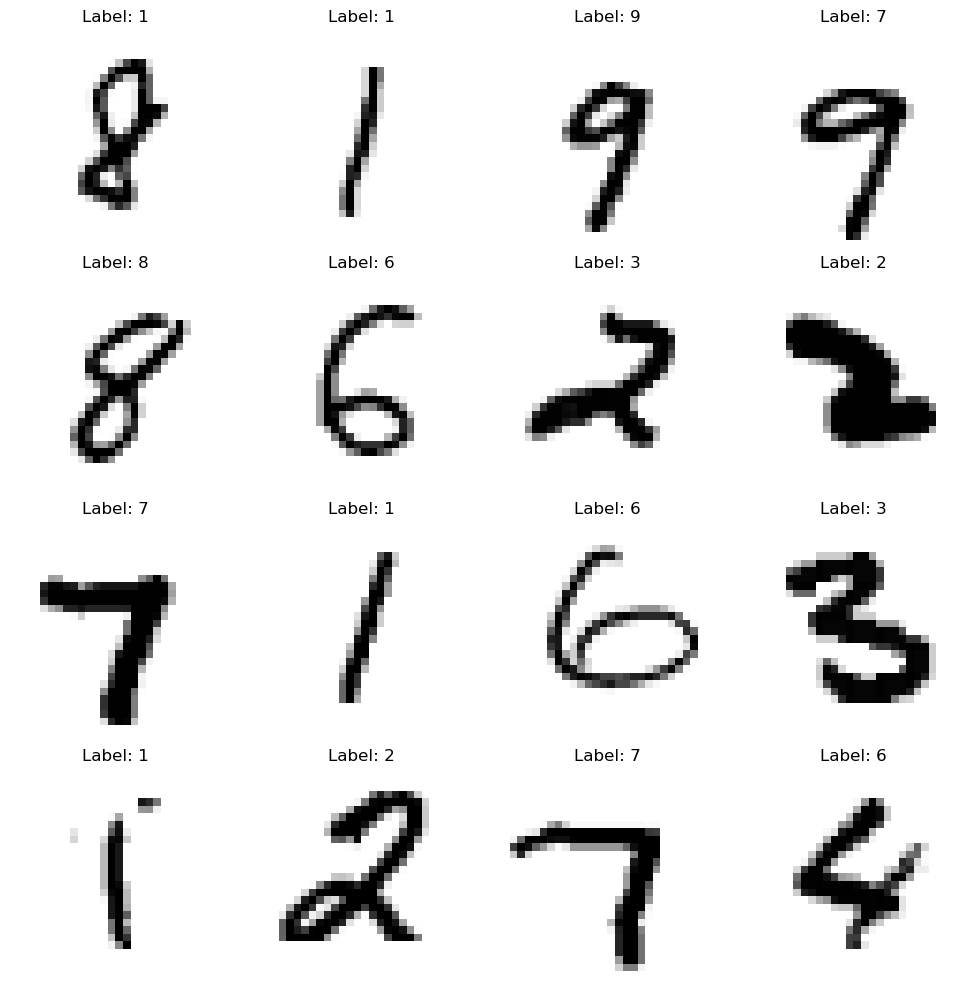

In [51]:
plot_images(nb_pred, val_labels_data_split, 4, 4)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fit_time_start = time.time()
rf.fit(train_labels_data_split, train_labels_split)
rf_fit_time_end = time.time()
rf_fit_time = rf_fit_time_end - rf_fit_time_start

In [92]:
rf_pred_time_start = time.time()
rf_pred = rf.predict(val_labels_data_split)
rf_pred_time_end = time.time()
rf_pred_time = rf_pred_time_end - rf_pred_time_start
score_rf = accuracy_score(val_labels_split, rf_pred)
print(score_rf)

0.9629761904761904


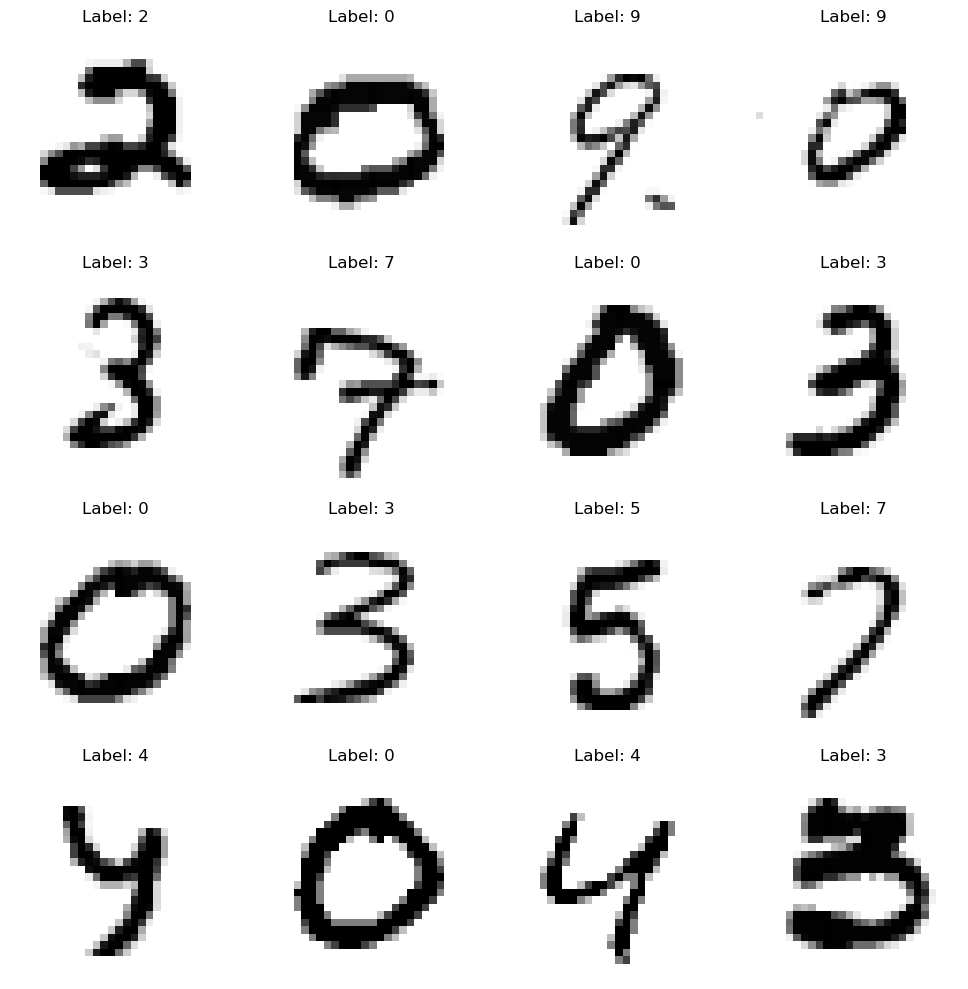

In [55]:
rf_test_pred = rf.predict(test_labels_data)
plot_images(rf_test_pred, test_labels_data, 4, 4)
save_preds(rf_test_pred,"rf_pred")

In [3]:
from sklearn.svm import LinearSVС
linear_svr = LinearSVR(random_state=42)
linear_svr_fit_time_start = time.time()
linear_svr.fit(train_labels_data_split, train_labels_split)
linear_svr_fit_time_end = time.time()
linear_svr_fit_time = linear_svr_fit_time_end - linear_svr_fit_time_start
linear_svr_pred_time_start = time.time()
linear_svr_pred = linear_svr.predict(val_labels_data_split)
linear_svr_pred_time_end = time.time()
linear_svr_pred_time = linear_svr_pred_time_end - linear_svr_pred_time_start

ImportError: cannot import name 'LinearSVС' from 'sklearn.svm' (D:\Anaconda\Lib\site-packages\sklearn\svm\__init__.py)

In [64]:
linear_svr_pred_rounded = np.round(linear_svr_pred).astype(int)
score_linear_svr = accuracy_score(val_labels_split, linear_svr_pred_rounded)
print(score_linear_svr)

0.2838095238095238


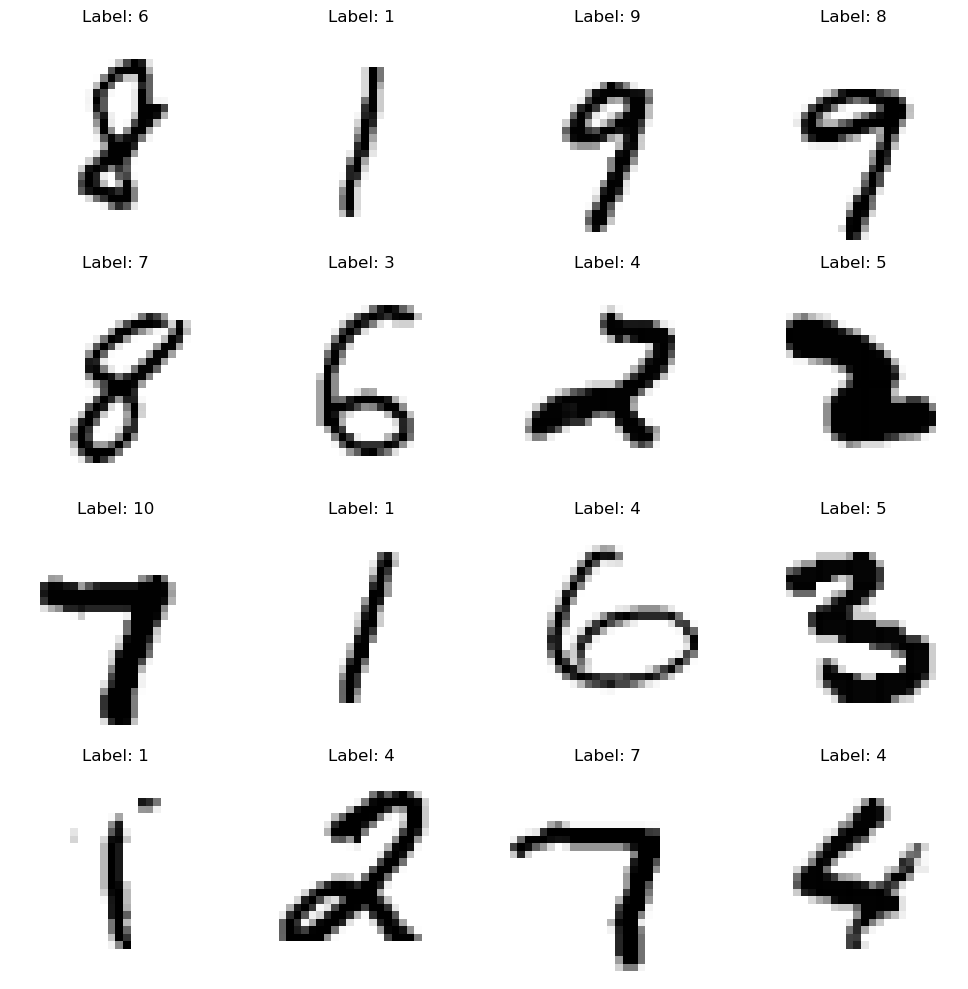

In [67]:
plot_images(linear_svr_pred_rounded, val_labels_data_split, 4, 4)

In [111]:
import seaborn as sns

In [101]:
results = {'Модель': [], 'Оценка': [], 'Время обучения': [], 'Время предсказания': []}
def add_results(model_name, score, fit_time, pred_time):
    results['Модель'].append(model_name)
    results['Оценка'].append(score)
    results['Время обучения'].append(fit_time)
    results['Время предсказания'].append(pred_time)

In [102]:
add_results('KNN', score_knn, knn_fit_time, knn_pred_time)
add_results('SVС', score_svс, svm_fit_time, svm_pred_time)
add_results("K-means", score_kmeans, kmeans_fit_time, kmeans_pred_time)
add_results('Naive Bayes', score_nb, nb_fit_time, nb_pred_time)
add_results('Random Forest', score_rf, rf_fit_time, rf_pred_time)
add_results("LinearSVR", score_linear_svr, linear_svr_fit_time, linear_svr_pred_time)

In [103]:
df = pd.DataFrame(results)

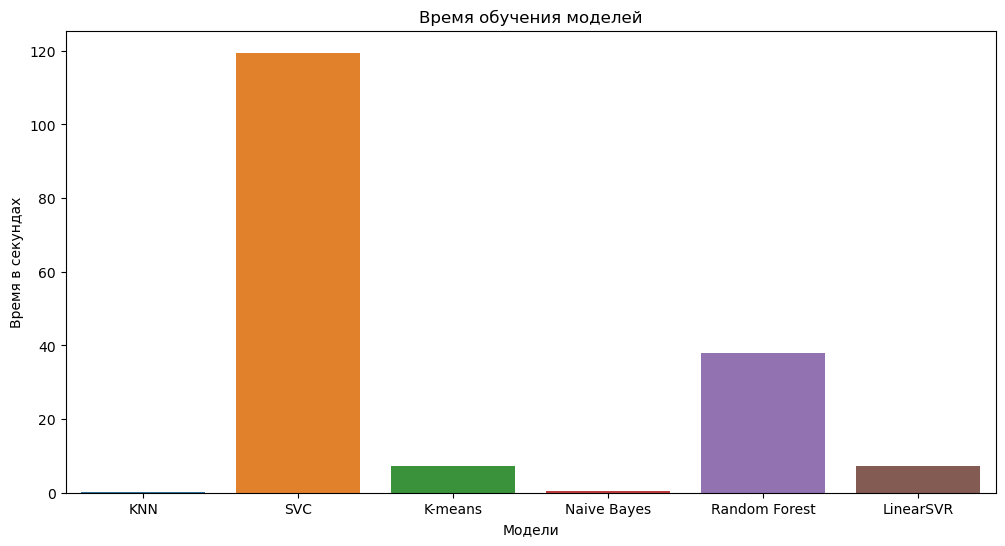

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Модель', y='Время обучения', data=df)
plt.title('Время обучения моделей')
plt.ylabel('Время в секундах')
plt.xlabel('Модели')
plt.show()

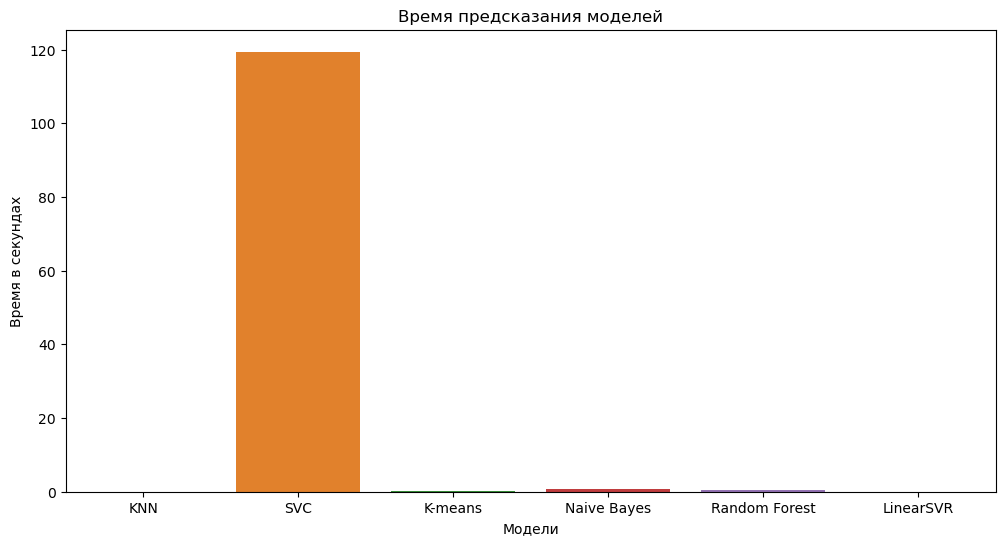

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Модель', y='Время предсказания', data=df)
plt.title('Время предсказания моделей')
plt.ylabel('Время в секундах')
plt.xlabel('Модели')
plt.show()

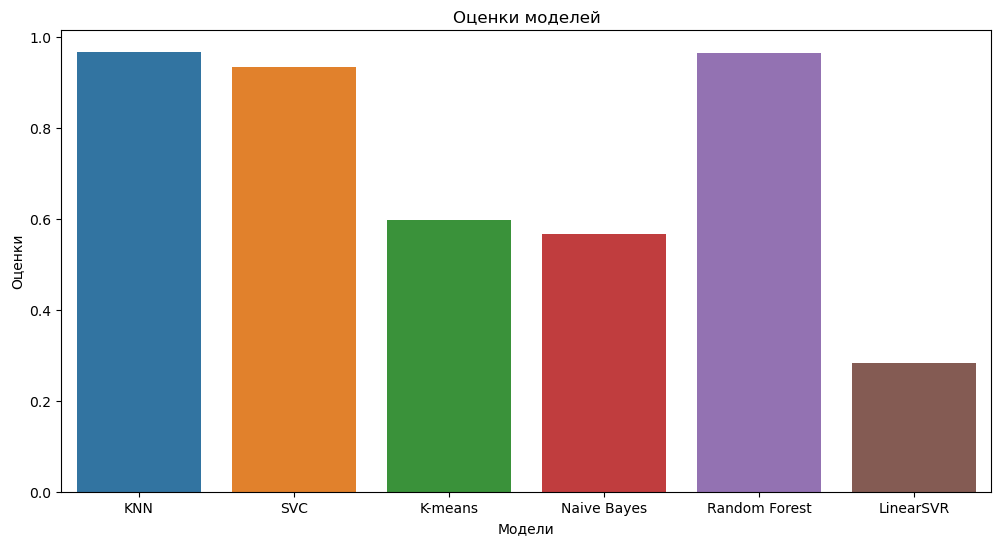

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Модель', y='Оценка', data=df)
plt.title('Оценки моделей')
plt.ylabel('Оценки')
plt.xlabel('Модели')
plt.show()

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

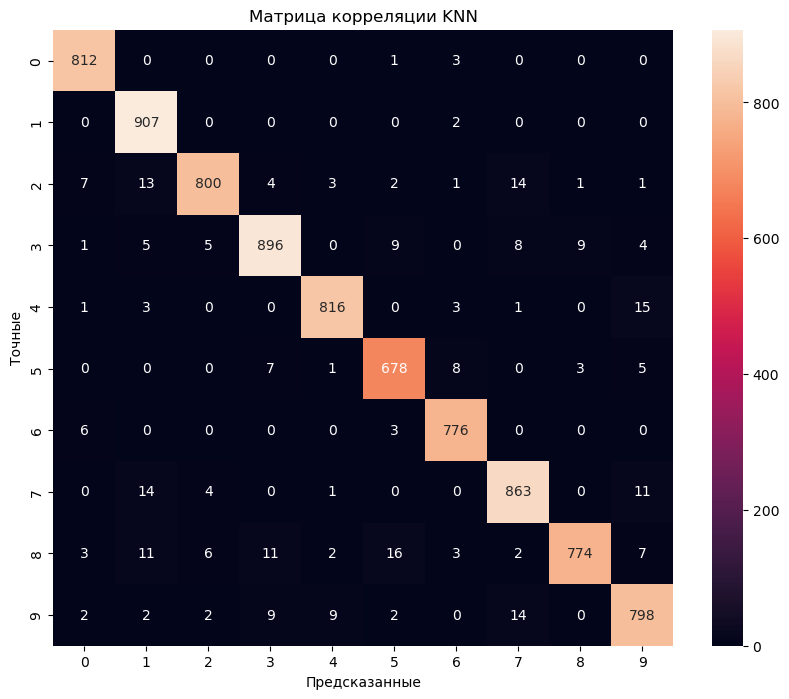

In [143]:
classification_report(val_labels_split, knn_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, knn_pred), annot=True, fmt='d')
plt.title('Матрица корреляции KNN')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

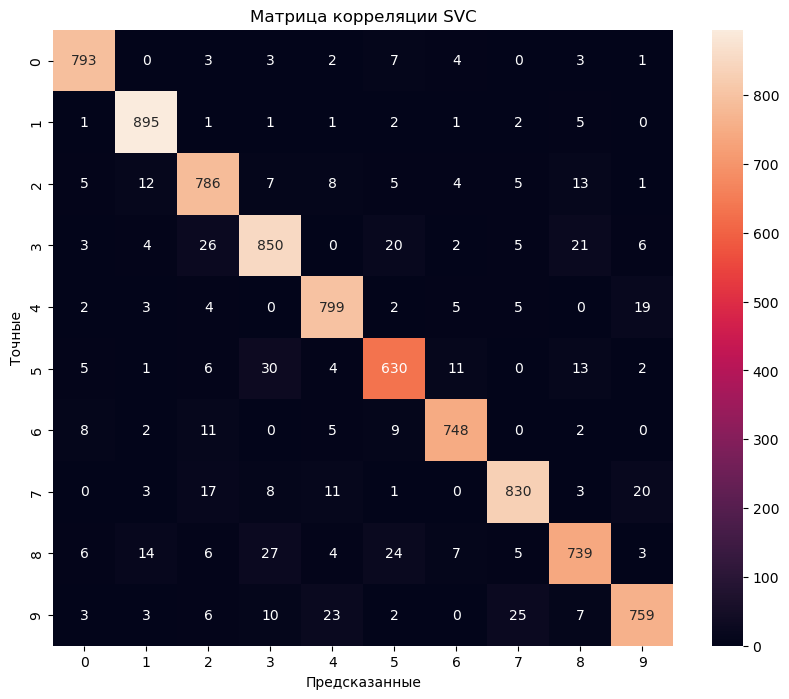

In [144]:
classification_report(val_labels_split, svс_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, svс_pred), annot=True, fmt='d')
plt.title('Матрица корреляции SVC')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


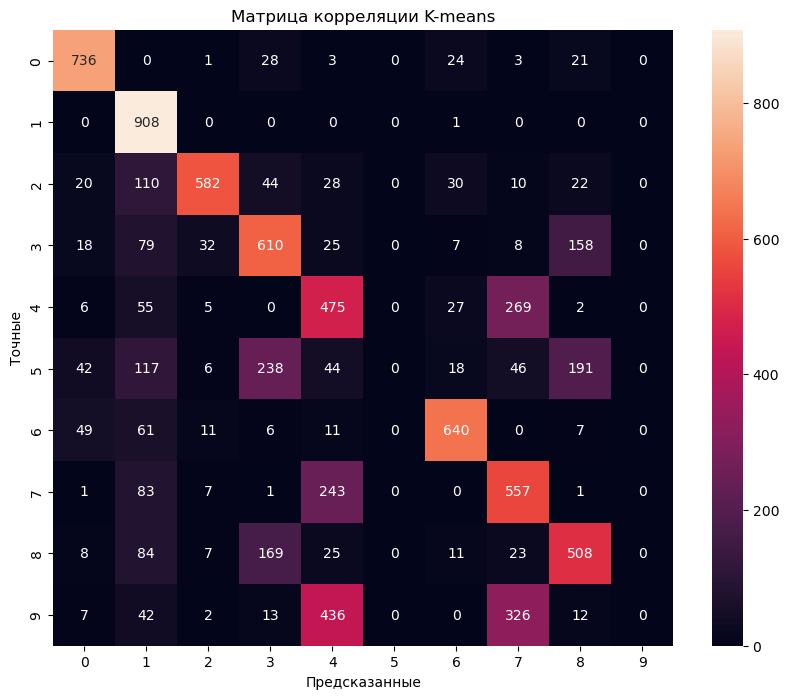

In [145]:
#Кластеры
classification_report(val_labels_split, kmeans_val_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, kmeans_val_classes), annot=True, fmt='d')
plt.title('Матрица корреляции K-means')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

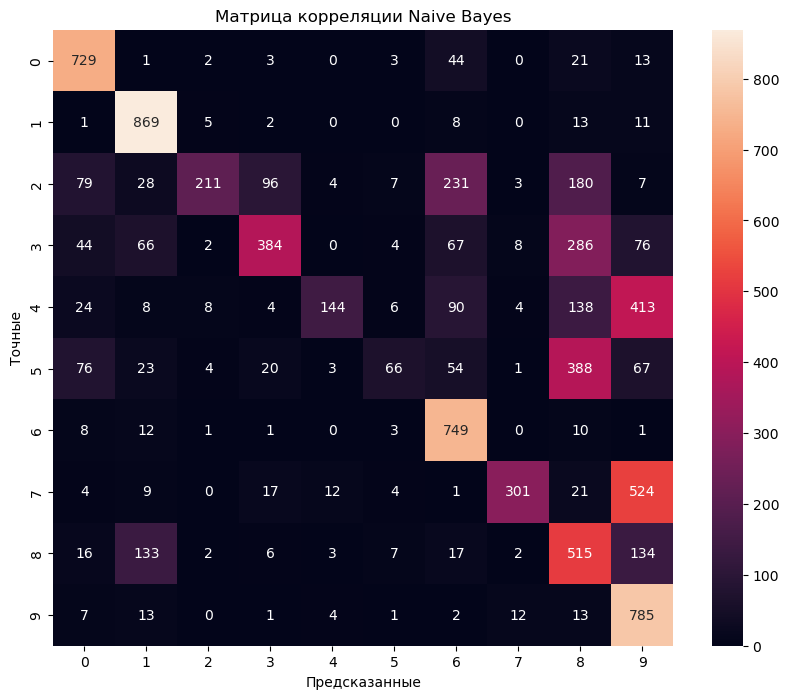

In [146]:
classification_report(val_labels_split, nb_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, nb_pred), annot=True, fmt='d')
plt.title('Матрица корреляции Naive Bayes')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

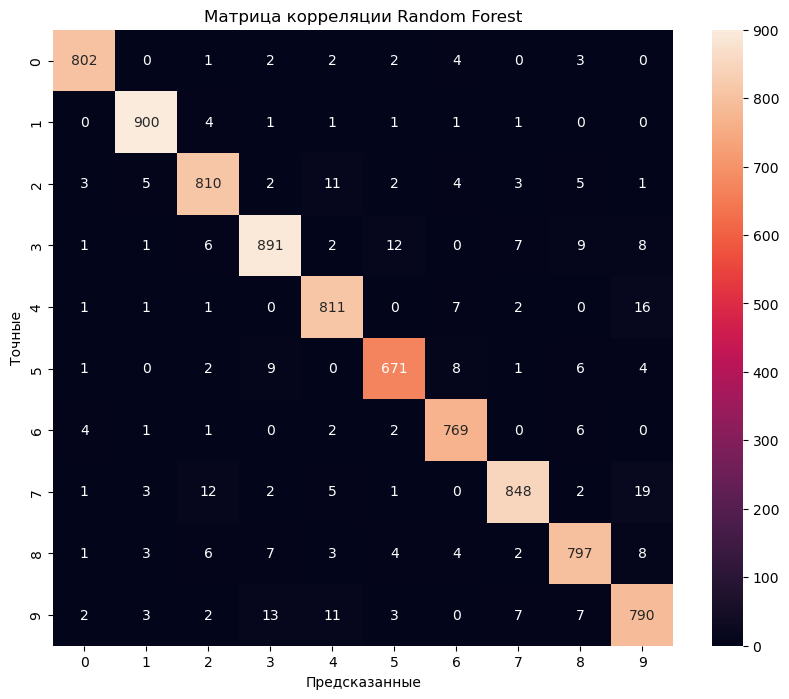

In [147]:
classification_report(val_labels_split, rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, rf_pred), annot=True, fmt='d')
plt.title('Матрица корреляции Random Forest')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


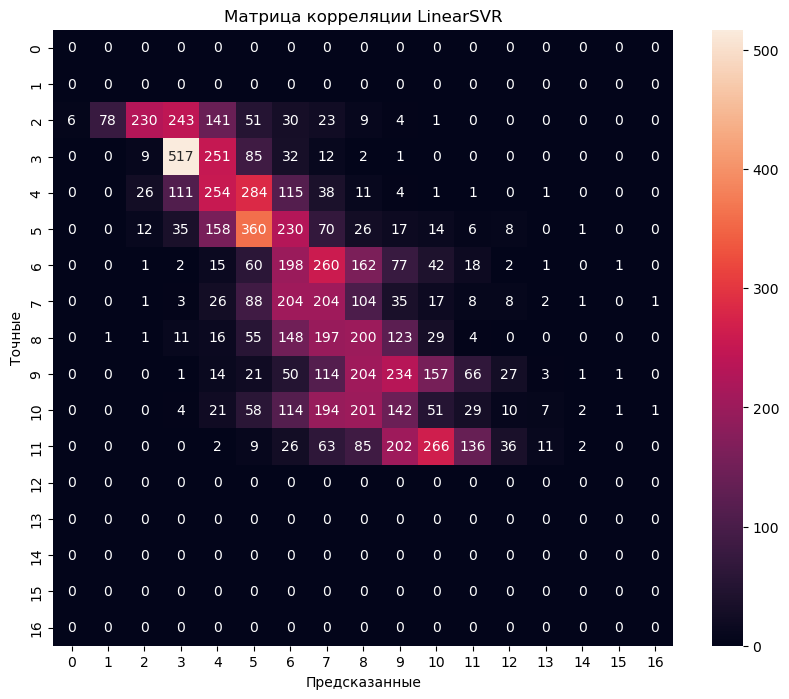

In [148]:
classification_report(val_labels_split, linear_svr_pred_rounded)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(val_labels_split, linear_svr_pred_rounded), annot=True, fmt='d')
plt.title('Матрица корреляции LinearSVR')
plt.ylabel('Точные')
plt.xlabel('Предсказанные')
plt.show()

In [168]:
def scatter_kdeplot_hits(title, val, pred):
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(val)), val, color='blue', label='Точные', alpha=0.6)
    plt.scatter(range(len(pred)), pred, color='red', label='Предсказанные', alpha=0.6)
    plt.title('График рассеяния '+ title)
    plt.xlabel('Степень рассеяния')
    plt.ylabel('Номер')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.kdeplot(val, label='Точные', color='blue')
    sns.kdeplot(pred, label='Предсказанные', color='red')
    plt.title('График распределения '+title)
    plt.xlabel('Номер')
    plt.ylabel('Степень распределения')
    plt.legend()
    plt.show()
    
    # Гистограмма
    plt.figure(figsize=(12, 6))
    sns.histplot(val, color='blue', label='Точные', alpha=0.6, bins=30)
    sns.histplot(pred, color='red', label='Предсказанные', alpha=0.6, bins=30)
    plt.title('Гистограмма '+title)
    plt.xlabel('Номер')
    plt.ylabel('Показатели')
    plt.legend()
    plt.show()

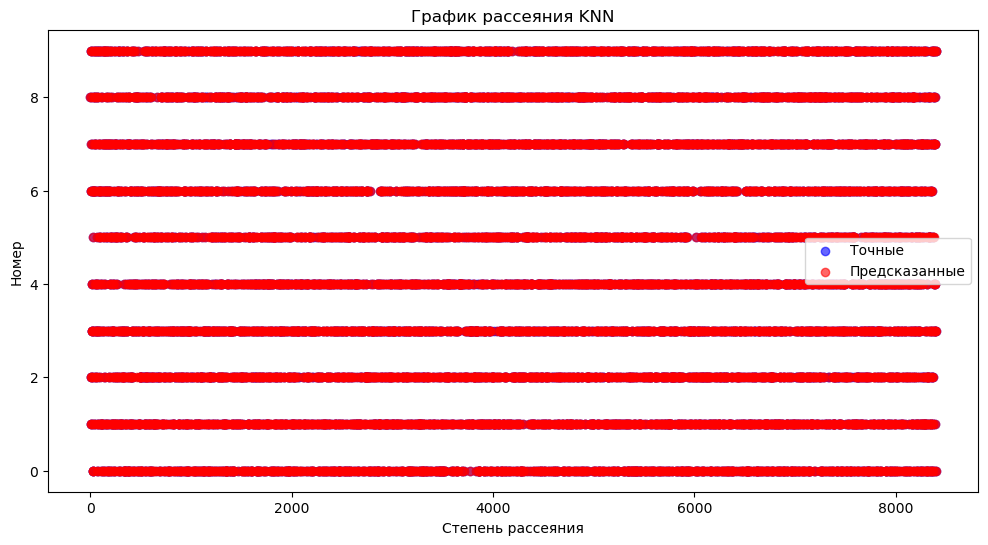

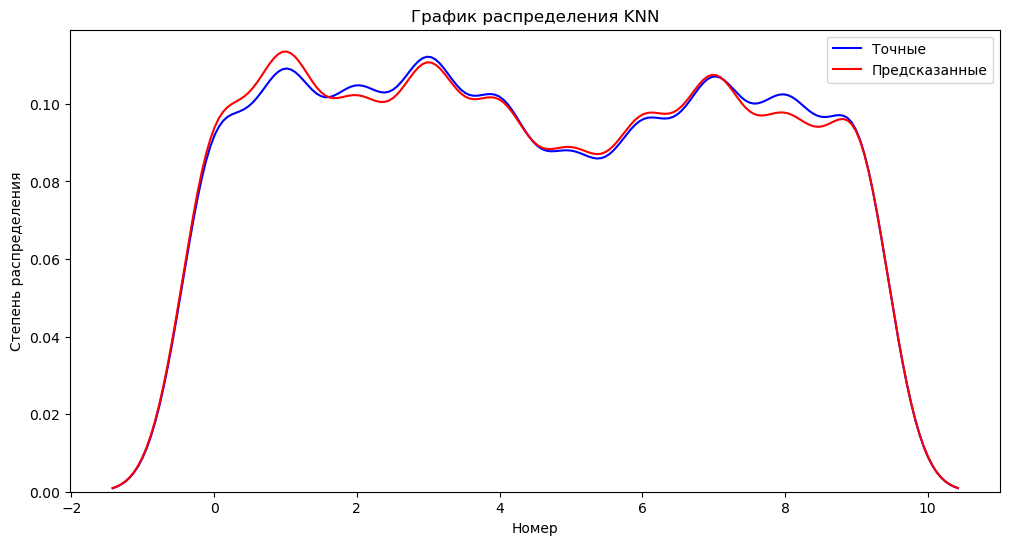

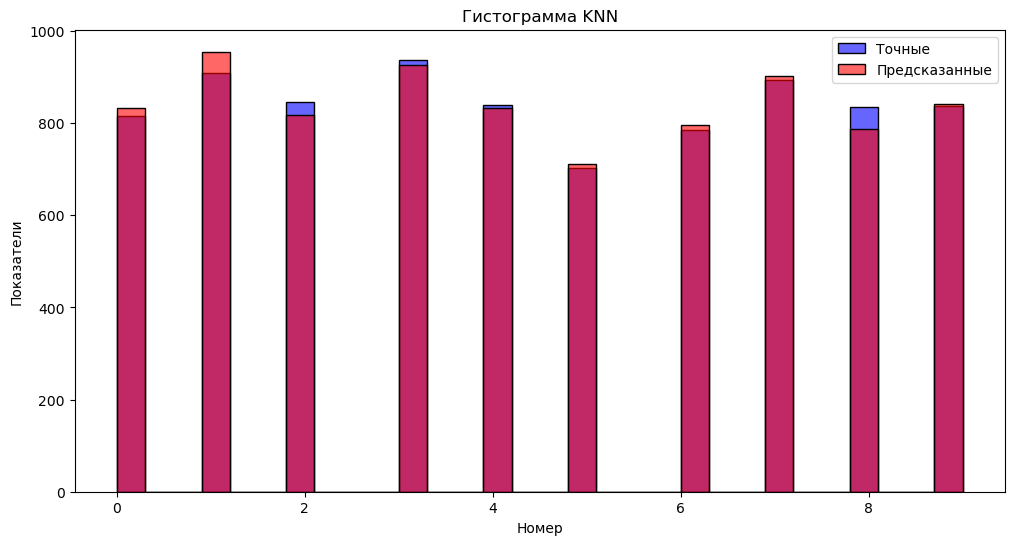

In [169]:
scatter_kdeplot_hits('KNN', val_labels_split, knn_pred)

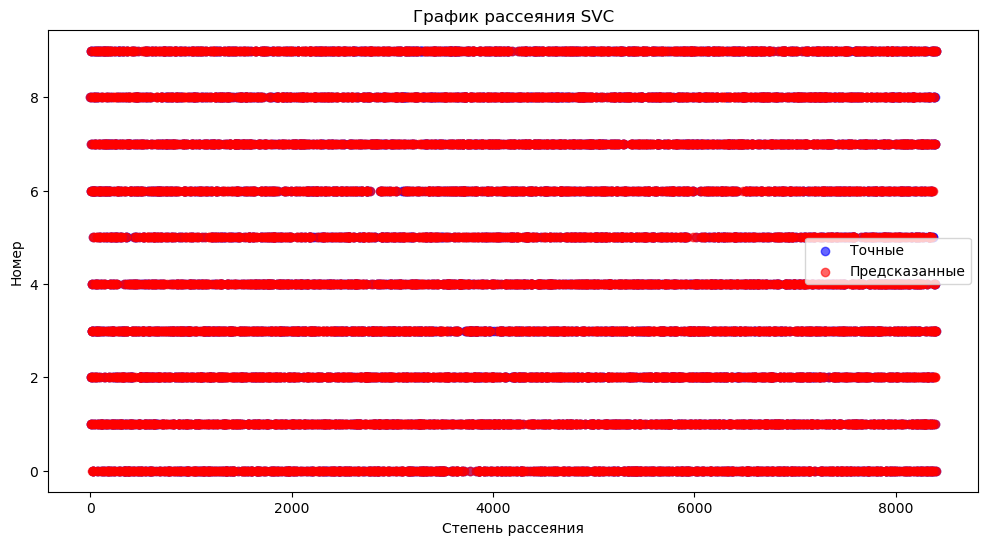

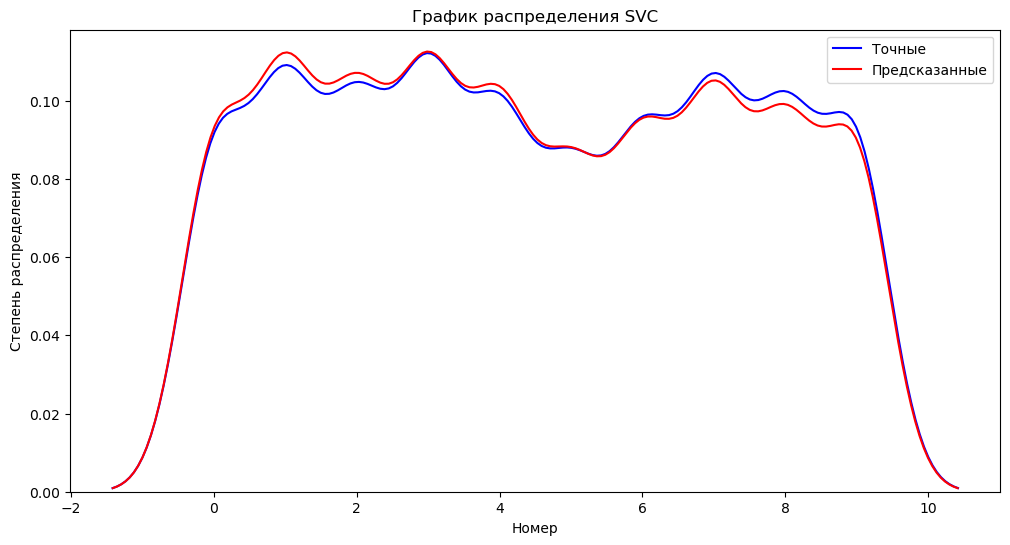

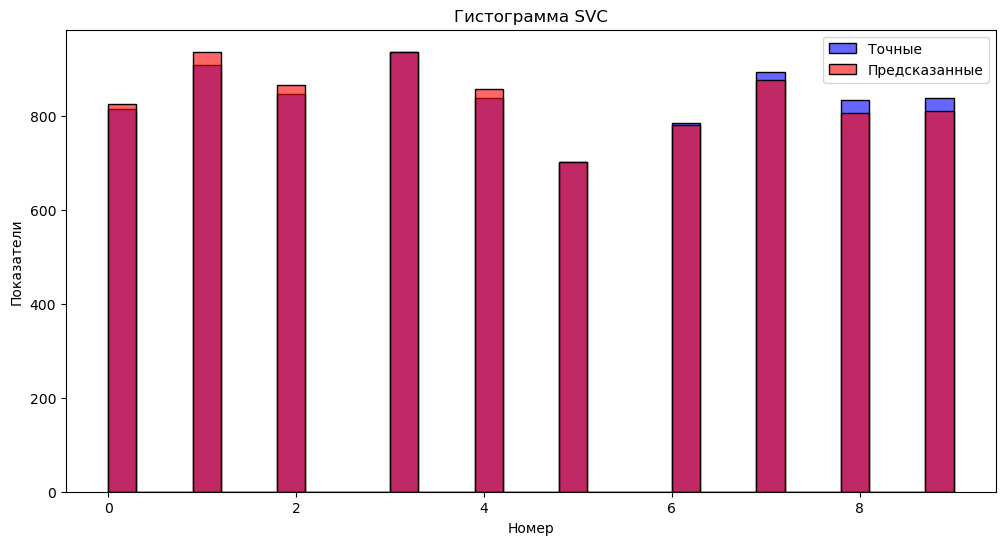

In [172]:
scatter_kdeplot_hits('SVC', val_labels_split, svc_pred)

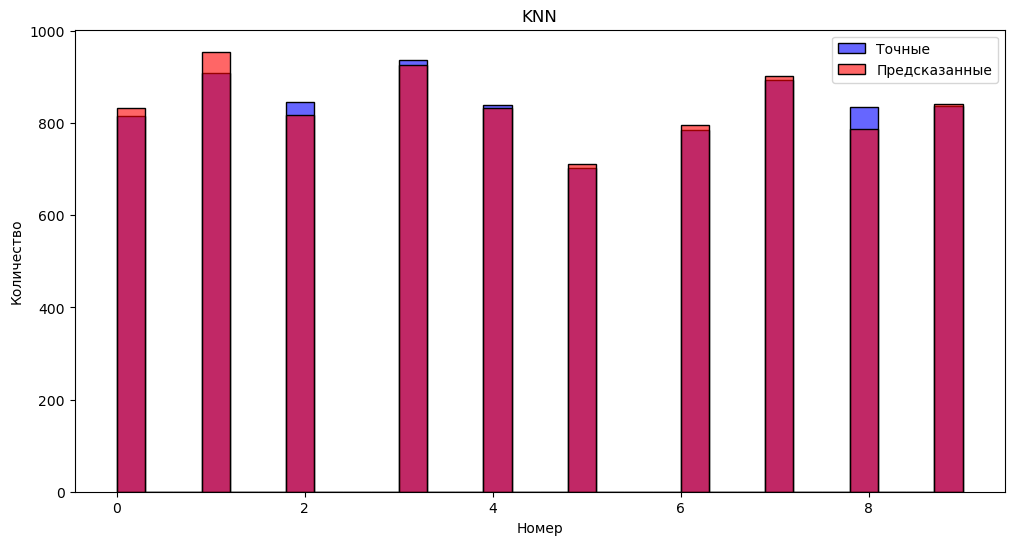

In [156]:
scatter_kdeplot_hits

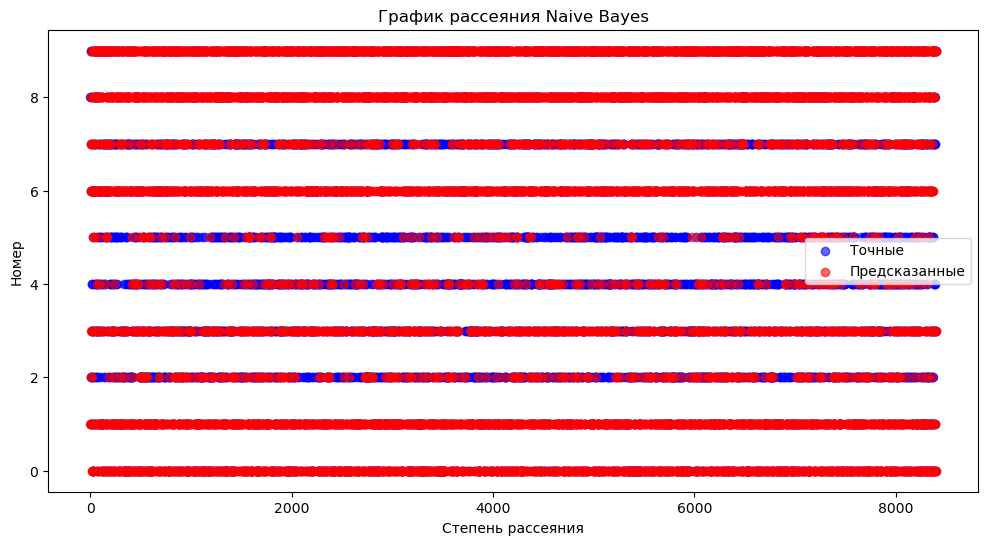

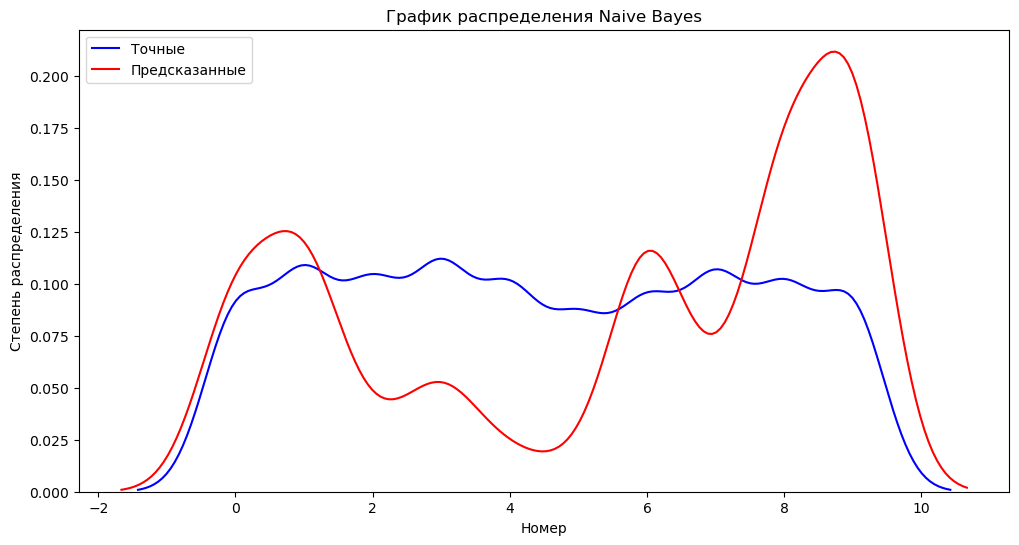

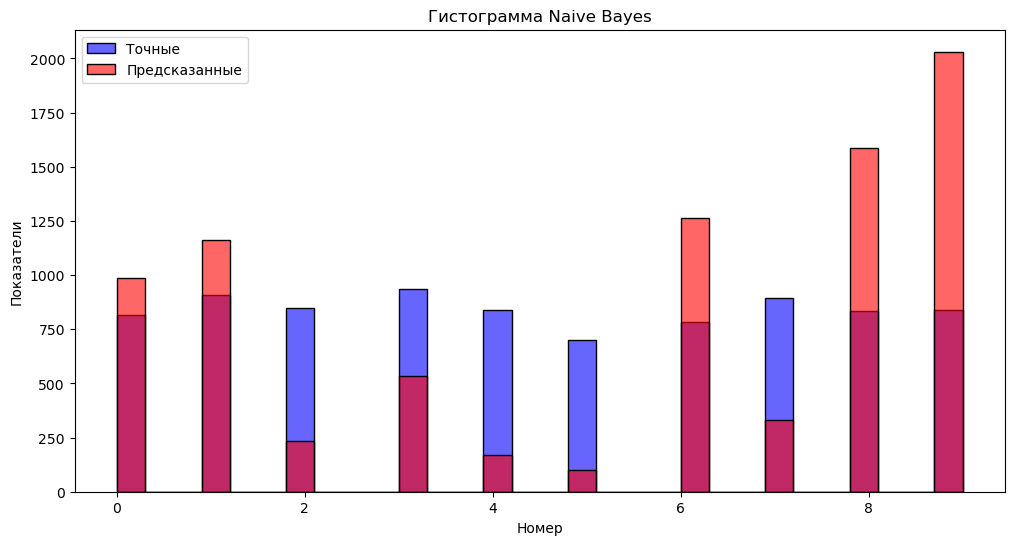

In [173]:
scatter_kdeplot_hits('Naive Bayes', val_labels_split, nb_pred)

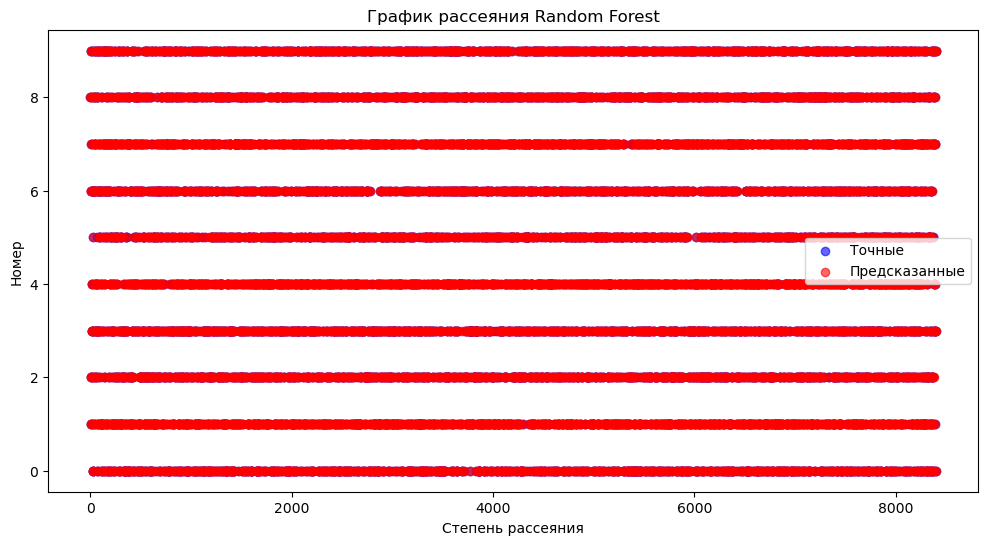

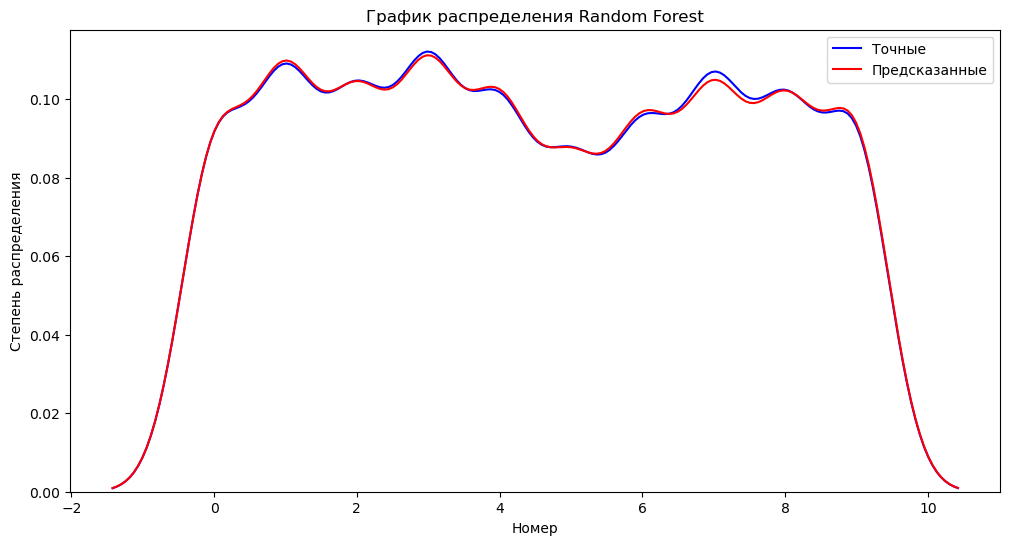

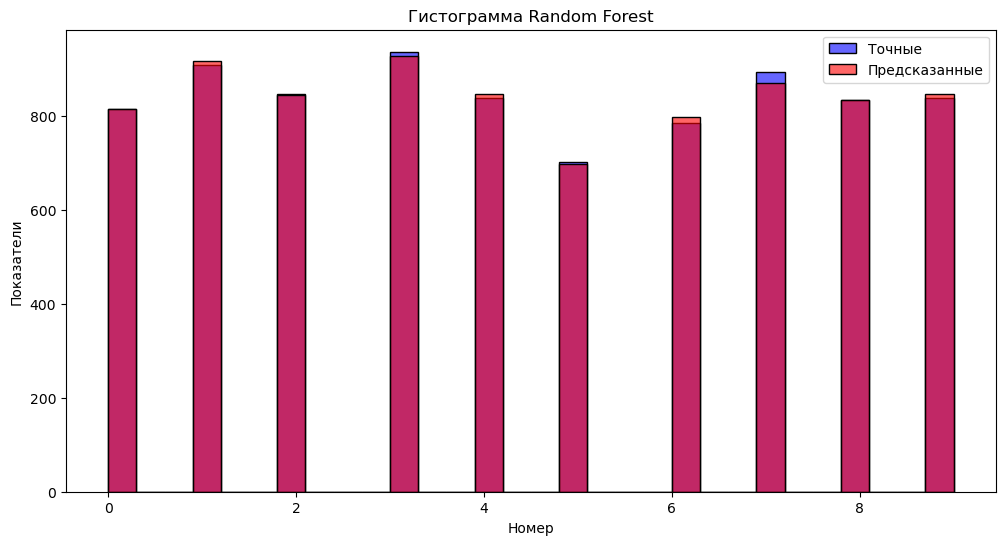

In [174]:
scatter_kdeplot_hits('Random Forest', val_labels_split, rf_pred)

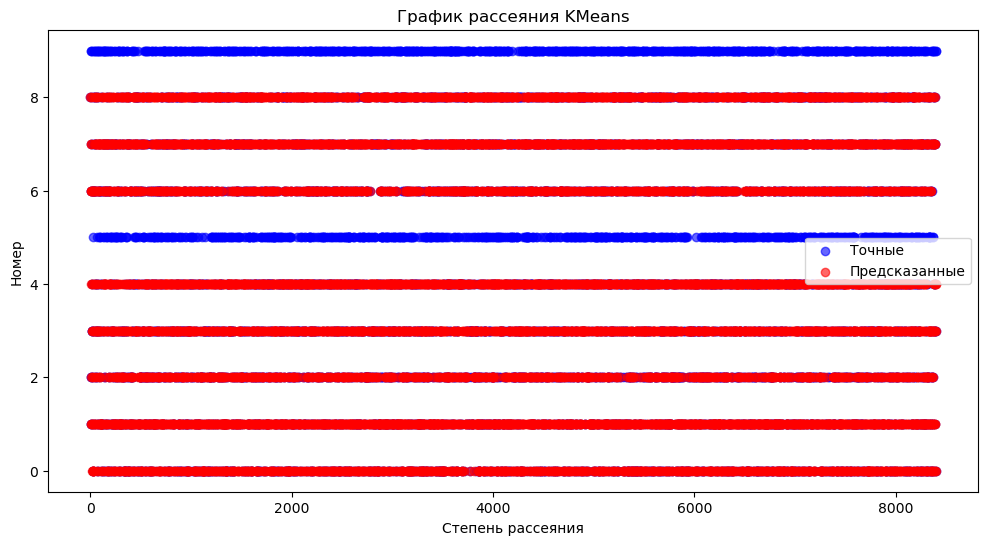

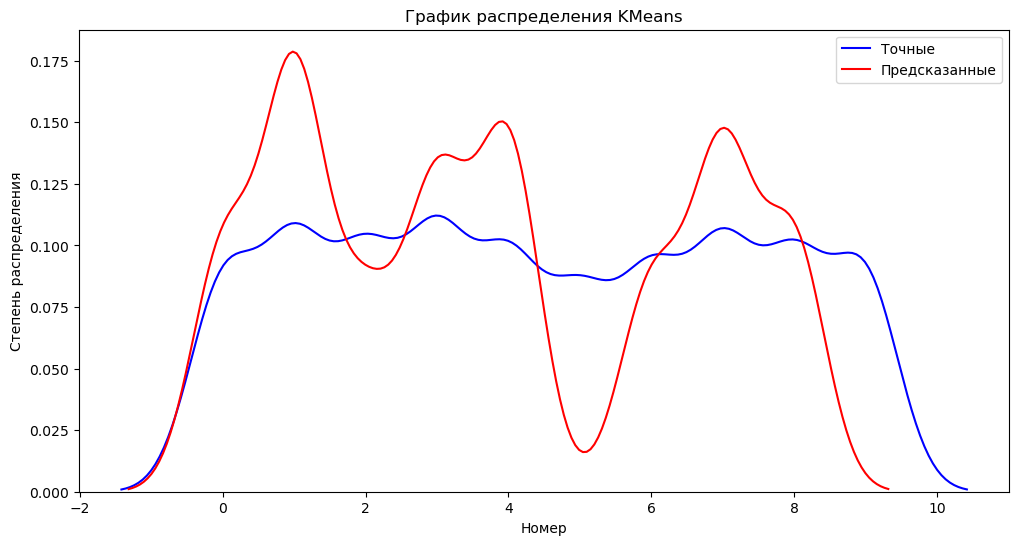

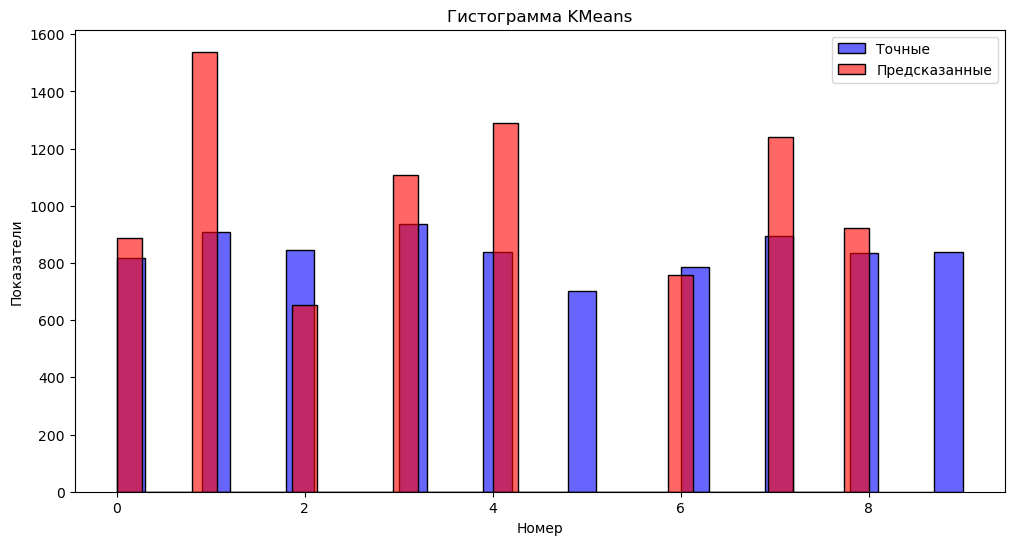

In [175]:
scatter_kdeplot_hits('KMeans', val_labels_split, kmeans_val_classes)

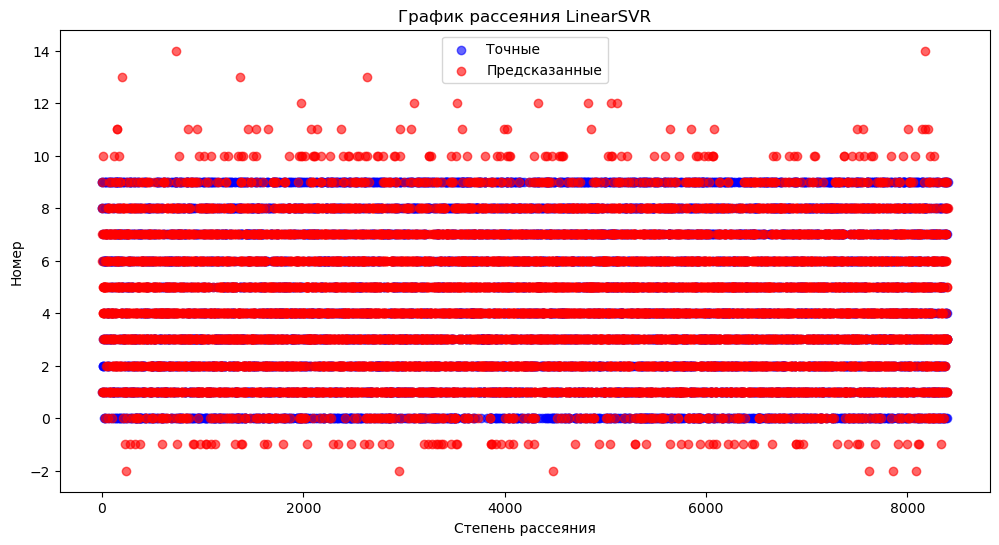

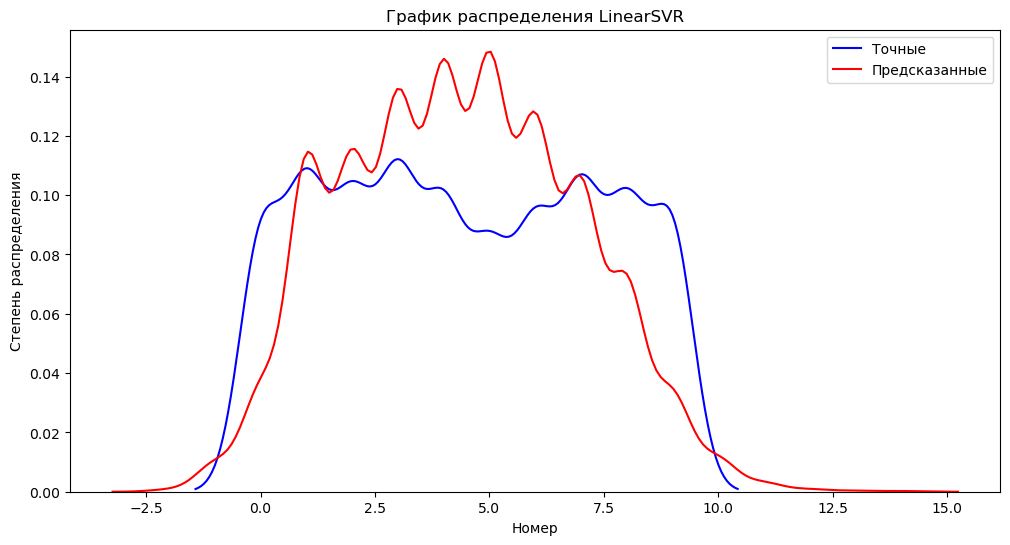

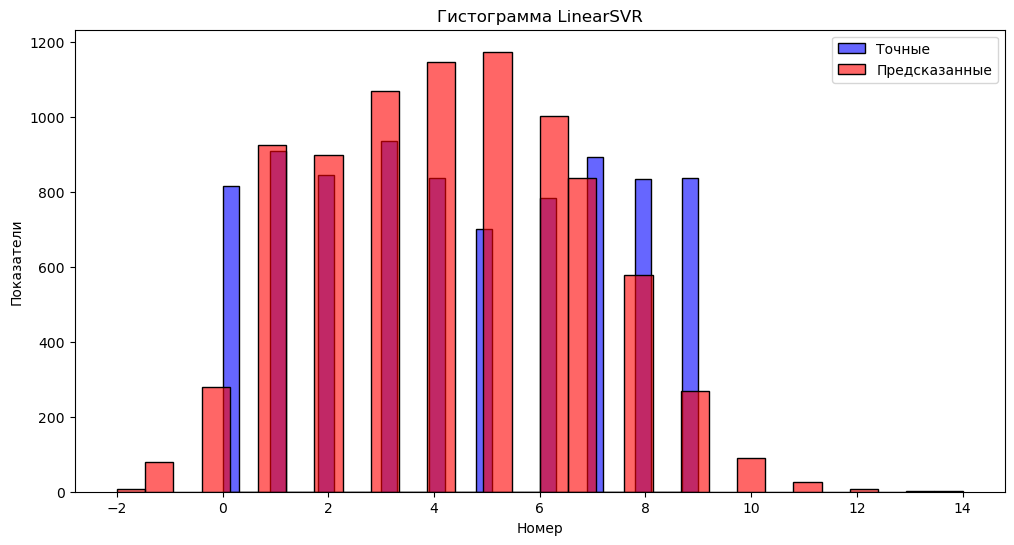

In [176]:
scatter_kdeplot_hits('LinearSVR', val_labels_split, linear_svr_pred_rounded)